In [1]:
from IPython import display
import matplotlib.pyplot as plt
import cPickle as pickle
import numpy as np
from keras.models import load_model
from keras.datasets import cifar10

% matplotlib inline
% config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
def plotRecord(pickle_file):
    with open(pickle_file, 'rb') as f:
        losses = pickle.load(f)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.figure(figsize=(10,8))
    plt.plot(losses["disc"], label='discriminitive loss')
    plt.plot(losses["gen"], label='generative loss')
    plt.plot(losses["acc_real"], label='discriminator accuracy on real images')
    plt.plot(losses["acc_gen"], label='discriminator accuracy on generated images')
    plt.plot(losses["acc_other"], label='discriminator accuracy on other images')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.ylim([0, 4])
    plt.show()

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def plotOriginalImages(image_class):
    samples = 0
    sample_indices = []
    while samples < 8:
        sample_index = np.random.randint(0, X_train.shape[0])
        if y_train[sample_index] == image_class:
            sample_indices.append(sample_index)
            samples += 1

    plt.figure(figsize=(10, 3))
    f = 0
    for index in sample_indices:
        f += 1
        plt.subplot(1, 8, f)
        img = X_train[index,:,:,:]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
def plotGeneratedImages(generator_file, rows=1):
    generator = load_model(generator_file)
    
    noise = np.random.uniform(0,1,size=[8*rows,100])
    generated_images = generator.predict(noise)

    plt.figure(figsize=(10, rows + 2))
    for i in range(generated_images.shape[0]):
        plt.subplot(rows, 8, i+1)
        img = generated_images[i,:,:,:]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

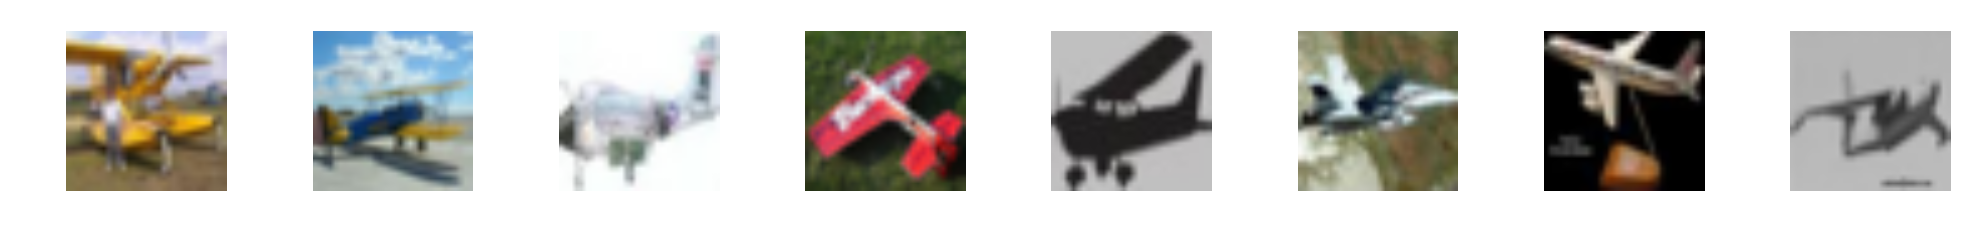

In [5]:
plotOriginalImages(0) # Original CIFAR-10 images

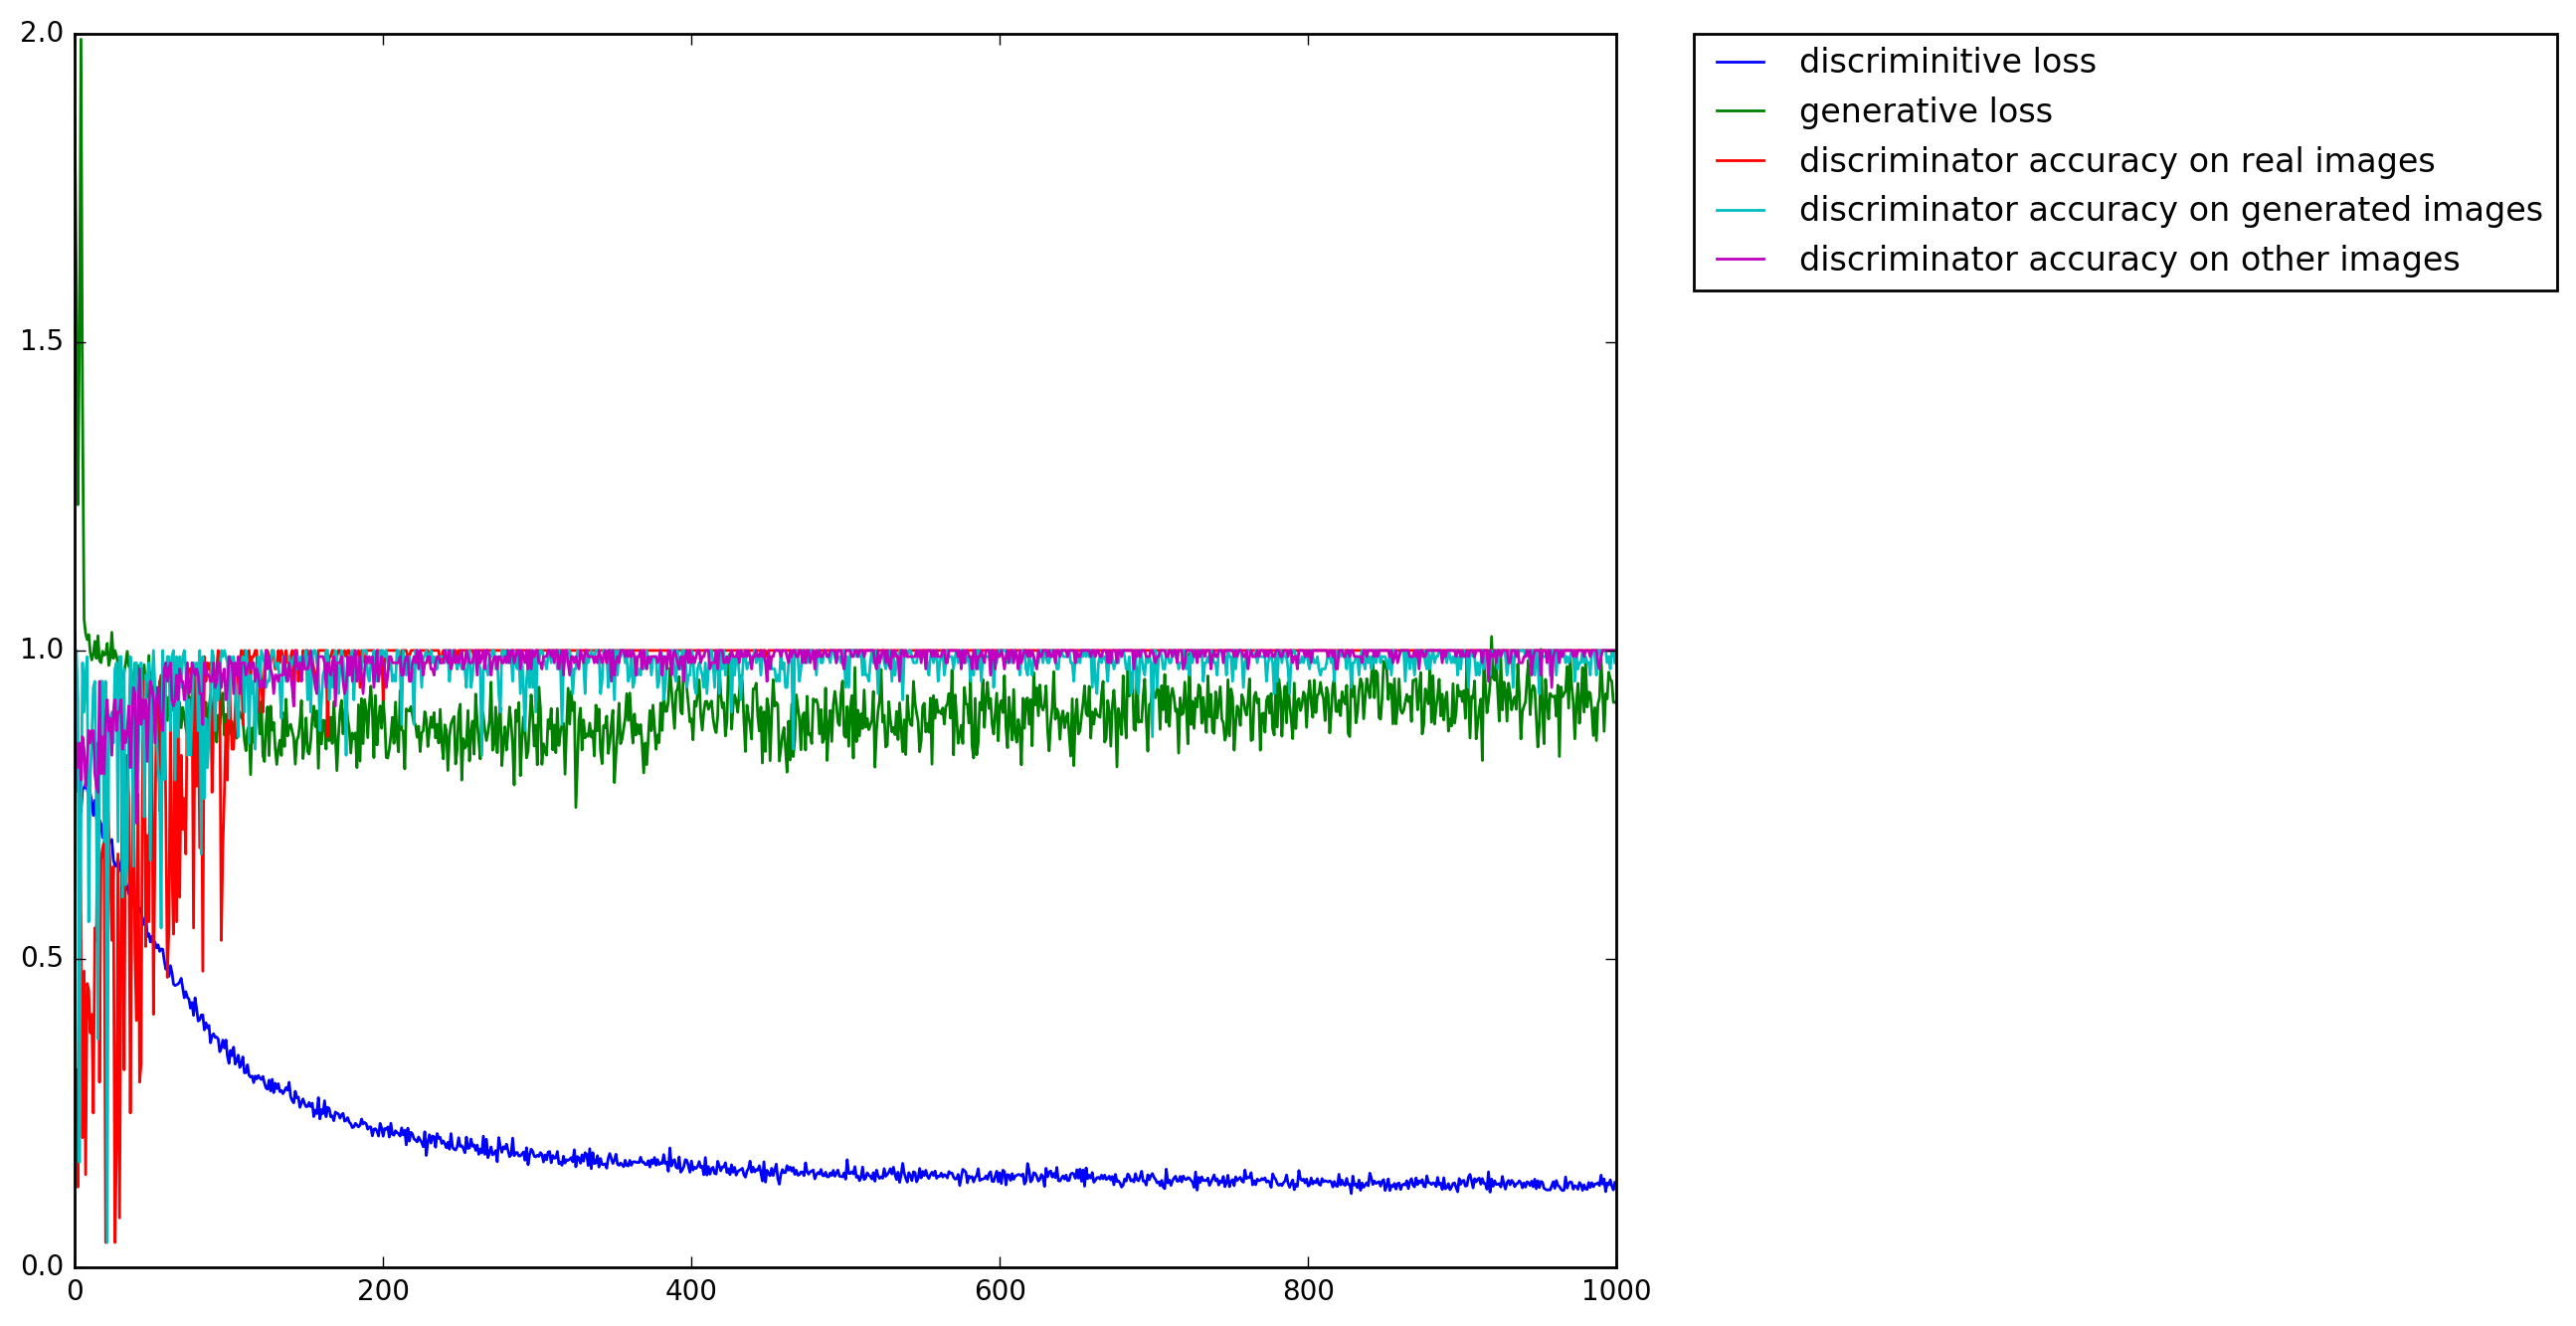

In [6]:
plotRecord('record0-1000.pickle')

In [ ]:
image_class = 0

for epochs in range(50, 1001, 50):
    save_file = 'gen' + str(image_class) + '-' + str(epochs) + '.h5'
    print "Class", image_class, "after", epochs, "epochs:"
    plotGeneratedImages(save_file)

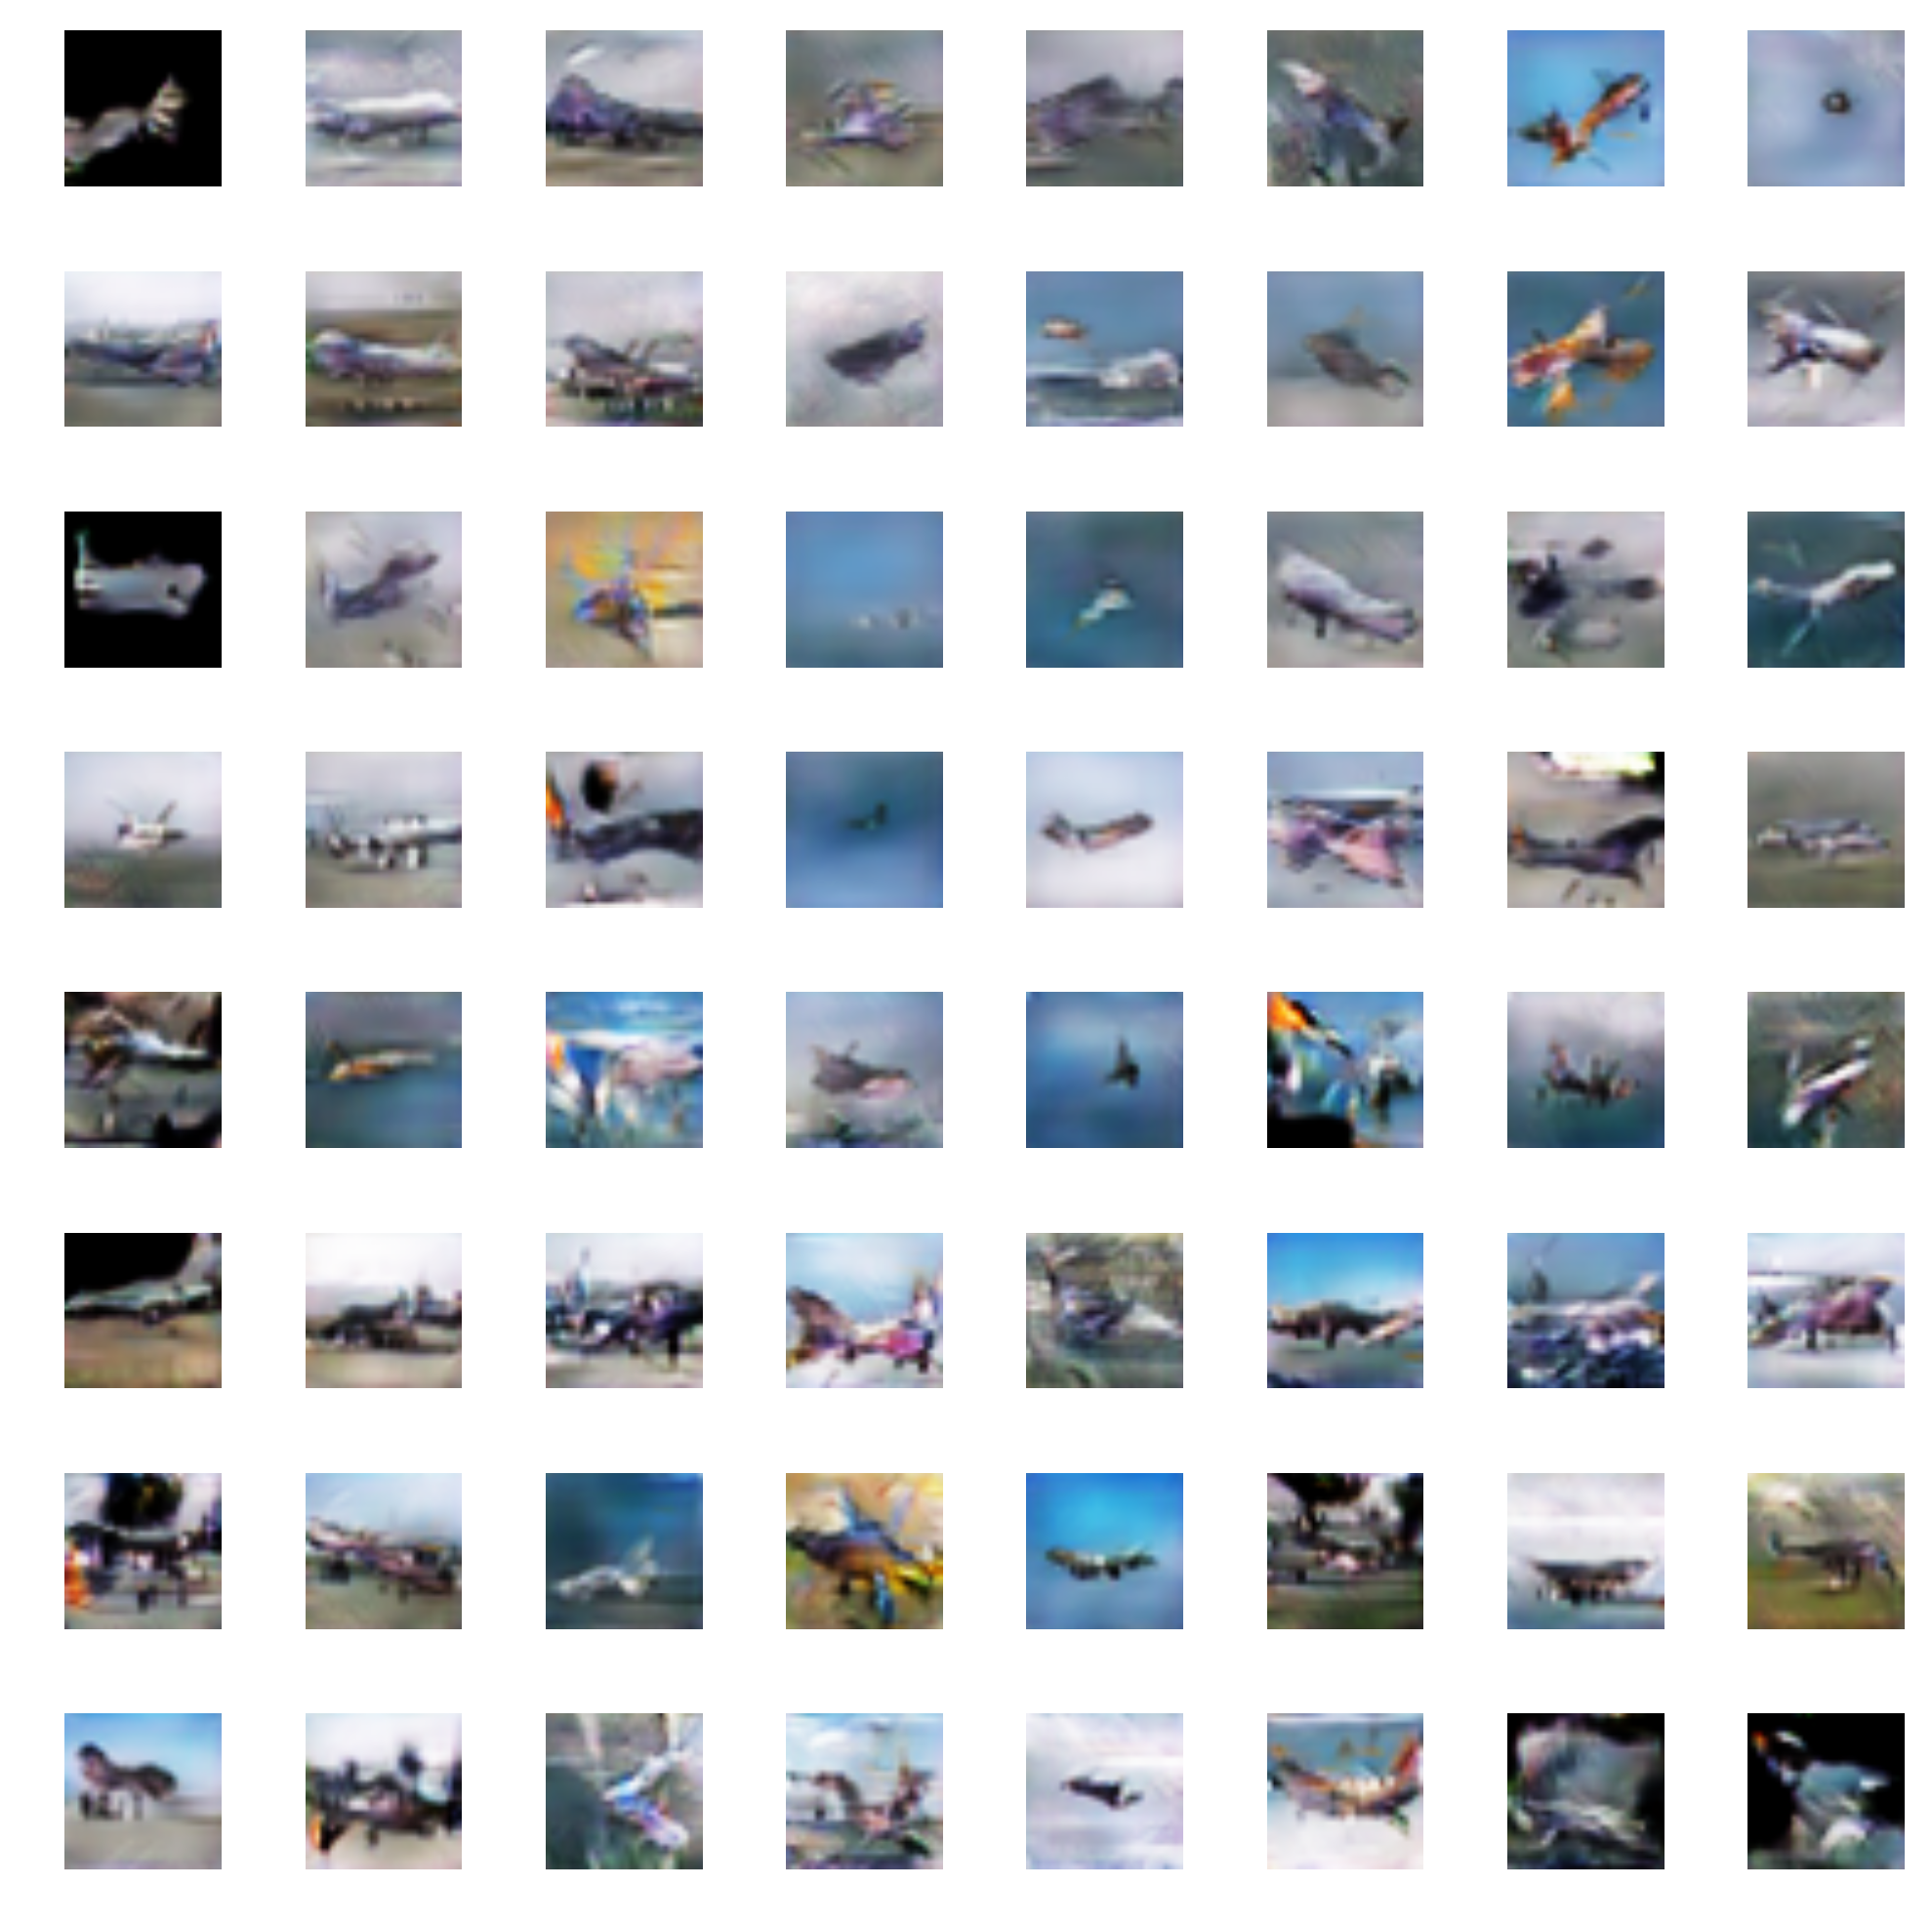

In [9]:
plotGeneratedImages('gen0-1000.h5', 8)